# Проверка центральной предельной теоремы на примере треугольного распределения

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts

## В качестве непрерывного распреления возьмем &ndash; треугольное распределение
*a &ndash; нижний предел (a&le;b)  
c &ndash; наиболее вероятное (a&le;c&le;b)  
b &ndash; верхний предел (c&le;b)*

In [88]:
a = 0
b = a + 1
c = b - 0.25
rv = sts.triang(c = (c - a) / (b - a), loc = a, scale = b - a)

(array(0.58333333), array(0.04513889))
M - 0.58333, D - 0.04514


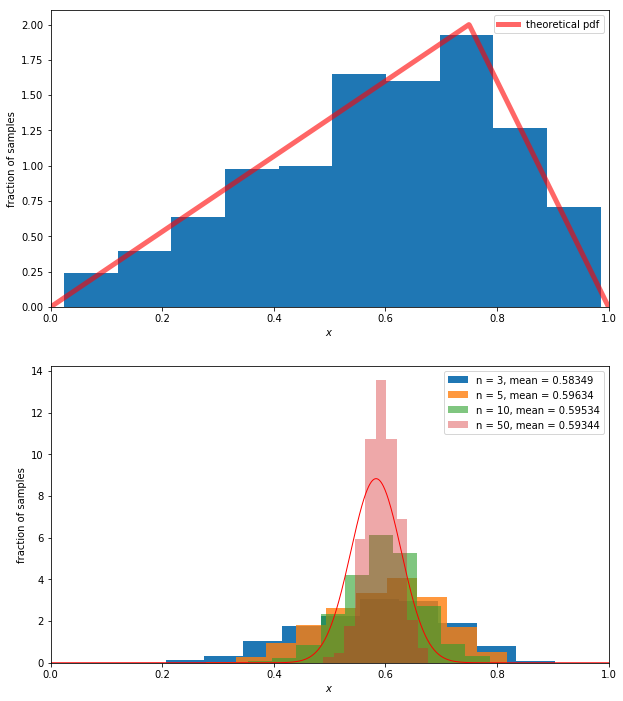

In [89]:
print(rv.stats())
mean = (a + b + c) / 3
variance = (a ** 2 + b ** 2 + c ** 2 - a * b - a * c - b * c) / 18
print('M - {}, D - {}'.format(round(mean, 5), round(variance, 5)))

sampleSize = 1000
x = np.linspace(a, b, sampleSize)

fig, ax = plt.subplots(2, 1, figsize=(10,12))
sample = rv.rvs(size=sampleSize)
ax_theory = ax[0]
ax_test = ax[1]
ax_theory.hist(sample, density=True)
ax_theory.plot(x, rv.pdf(x), 'r-', lw=5, alpha=0.6, label='theoretical pdf')
ax_theory.set_ylabel('fraction of samples')
ax_theory.set_xlabel('$x$')
ax_theory.set_xlim(a, b)
ax_theory.legend()
numTrials = 1000
n = [3, 5, 10, 50]
meanOfMeans = {}
for nSize in n:
    current_nMean = []
    for t in range(numTrials):
        n_sample = np.random.choice(sample, nSize)
        current_nMean.append(sum(n_sample) / len(n_sample))
    meanOfMeans[nSize] = current_nMean
x = np.linspace(a, b, numTrials)
alpha = 1
for nSize in n:
    ax_test.hist(meanOfMeans[nSize],
                 density=True,
                 alpha = alpha,
                 label = 'n = {0}, mean = {1}'.format(nSize, round(sum(meanOfMeans[nSize]) / numTrials, 5)))
    alpha -= 0.2
ax_test.set_ylabel('fraction of samples')
ax_test.set_xlabel('$x$')
ax_test.set_xlim(a, b)
ax_test.legend()
norm_rv = sts.norm(mean, variance)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, 'r-', lw=1, label='theoretical pdf')
plt.show()